yt : [INFO     ] 2023-09-29 15:34:35,413 Particle file found: def_high_dens_hdf5_chk_000030
yt : [WARNING  ] 2023-09-29 15:34:35,433 Extending theta dimension to 2PI + left edge.
yt : [INFO     ] 2023-09-29 15:34:35,477 Parameters: current_time              = 3.0000116827922714
yt : [INFO     ] 2023-09-29 15:34:35,478 Parameters: domain_dimensions         = [ 64 128   1]
yt : [INFO     ] 2023-09-29 15:34:35,480 Parameters: domain_left_edge          = [ 0.00000e+00 -1.31072e+10  0.00000e+00]
yt : [INFO     ] 2023-09-29 15:34:35,481 Parameters: domain_right_edge         = [1.31072000e+10 1.31072000e+10 6.28318531e+00]
yt : [INFO     ] 2023-09-29 15:34:35,481 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-09-29 15:34:44,921 xlim = -6043600000.000000 7063600000.000000
yt : [INFO     ] 2023-09-29 15:34:44,921 ylim = -13107200000.000000 13107200000.000000
yt : [INFO     ] 2023-09-29 15:34:44,921 Setting origin='native' for cylindrical geometry.
yt : [INFO     ] 2023-09-29 15

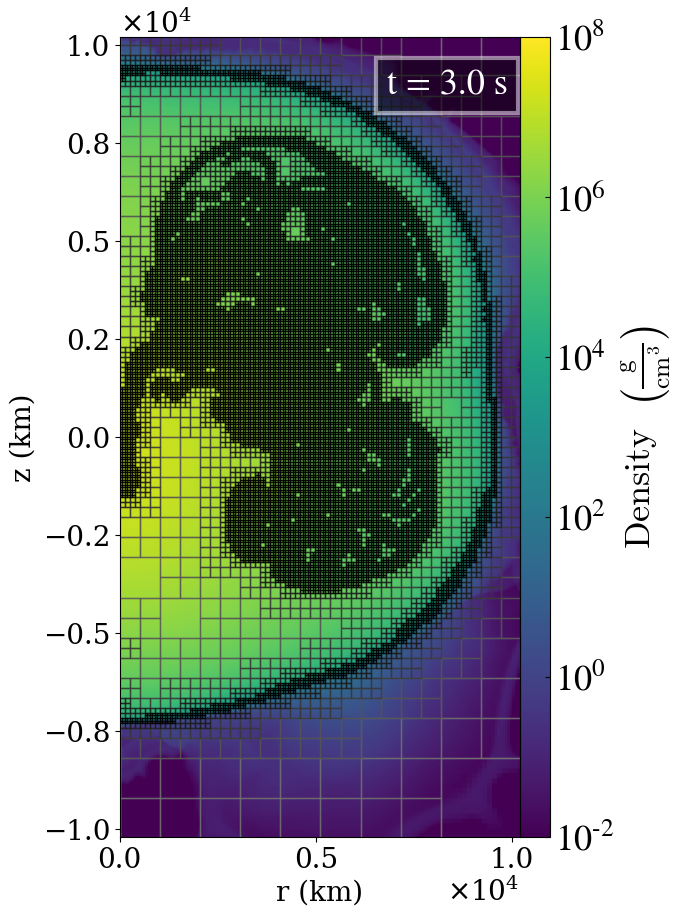

In [6]:
import yt
import glob
import mpi4py
from unyt import unyt_array
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.ticker import ScalarFormatter
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.tri as tri
import matplotlib.ticker as ticker

class ScalarFormatterForceFormat(ScalarFormatter):
    def _set_format(self):
        self.format = "%1.1f"

plt.rcParams['font.family'] = 'DejaVu Serif'
mpl.rcParams['font.sans-serif'] = ['Times']

cent = 5.1e8

files = glob.glob ("def_high_dens_hdf5_chk_000030")
files.sort()



for file in files:
    ds = yt.load(file)
    
###########===============================functions begins here=====================================##############    

    def part_pos_r(field, data):
        return (data["all", "particle_posx"])
    ds.add_field(("all", "particle_position_r"), function = part_pos_r, sampling_type = "particle", units = "auto")
    
    def part_pos_z(field, data):
        return (data["all", "particle_posy"])
    ds.add_field(("all", "particle_position_z"), function = part_pos_z, sampling_type = "particle", units = "auto", force_override = True)
    
###########===============================functions ends here=====================================##############
    
    fig, ax = plt.subplots(1,2)
    
    ad = ds.all_data()
    
    slc = yt.SlicePlot(ds, 'theta', ('gas', 'density'), center=[cent,0,0])
    slc.set_zlim(('gas', 'density'), 1.0e-2, 1.0e8)
    slc.set_cmap (field = ('gas', 'density'), cmap = "viridis")
    #slc.annotate_particles(width = (4*cent, "cm"), p_size=5.0, col='k', marker='o', ptype='all',alpha=1.0)
    #slc.annotate_title("Density Plot with 'Iron' clumps in contours")
    slc.set_font_size(26)
    #slc.annotate_contour(field = ('deposit', 'unbound_particles_nn_X_fe'),levels = 3,take_log = False ,plot_args = {"colors":"red", "linewidths": 0.5})
    slc.annotate_timestamp (corner='upper_right', draw_inset_box=True, redshift = False)
    slc.annotate_grids()
    slc.set_width((2*cent, 4*cent))
    slc.hide_axes()
    

        
    plot = slc.plots[("gas","density")]
    plot.figure = fig
    plot.axes = ax[0].axes
    plot.cax = fig.add_axes(ax[1])
    slc.render()
    axes_locations = ax[0].axes.get_axes_locator()
        
    x0, y0, w0, h0 = ax[0].axes.get_position().bounds
    scatter_plot = fig.add_axes((x0, y0, w0, h0),facecolor = "None")
        
    #sp = scatter_plot.scatter((ad["all", "particle_posx"])*1.0e-5,(ad["all", "particle_posy"])*1.0e-5 , marker = 'o', facecolor = 'none',alpha = 1.0, s = 3, color = 'red')
        
    xx0 ,xx1 = ax[0].axes.get_xlim()
    yy0 ,yy1 = ax[0].axes.get_ylim()
    scatter_plot.set_xlim(xx0,xx1)
    scatter_plot.set_ylim(yy0,yy1)
    scatter_plot.set_axes_locator(axes_locations)
    yfmt = ScalarFormatterForceFormat()
    yfmt.set_powerlimits((0,0))
    scatter_plot.yaxis.set_major_formatter(yfmt)
    scatter_plot.xaxis.set_major_formatter(yfmt)
    scatter_plot.ticklabel_format(axis = 'both', style = 'sci', useMathText= True, scilimits = [0,0])
    scatter_plot.tick_params(axis='both',labelsize = 20)
    scatter_plot.xaxis.get_offset_text().set_fontsize(20)
    scatter_plot.yaxis.get_offset_text().set_fontsize(20)
    scatter_plot.set_xlabel('r (km)', fontsize = 20)
    scatter_plot.set_ylabel('z (km)', fontsize = 20)
    plt.show()
    fig.savefig("all_annonated_clumps.png",bbox_inches="tight")
    